In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input/'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import os

# Specify the directory containing the CSV files
directory_path = 'C://Users//skeshavaiah//Downloads//TaxiDataset//'

# List to store DataFrames
dataframes = []

# Iterate over all files in the specified directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

  tpep_pickup_datetime  VendorID tpep_dropoff_datetime  passenger_count  \
0  2022-01-01 00:00:08         2   2022-01-01 00:14:14              1.0   
1  2022-01-01 00:00:11         2   2022-01-01 00:14:29              1.0   
2  2022-01-01 00:00:17         2   2022-01-01 00:31:04              1.0   
3  2022-01-01 00:00:18         2   2022-01-01 00:13:27              1.0   
4  2022-01-01 00:00:20         2   2022-01-01 00:20:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.94         1.0                  N           138           255   
1           5.55         1.0                  N           132           215   
2           3.86         1.0                  N           170            68   
3           3.37         1.0                  N            79           209   
4           4.89         1.0                  N            68           256   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [3]:
# Read the input data to dataframe
# read data
taxidf = merged_df

In [4]:
print(taxidf.shape)

(38287234, 19)


In [5]:
# List Categorical Columns
categorical_columns = taxidf.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns:", categorical_columns)

# List Numerical Columns
numerical_columns = taxidf.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Categorical columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']
Numerical columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [6]:
uniquesf = taxidf['store_and_fwd_flag'].unique()
print("Unique values in 'store_and_fwd_flag' column:", uniquesf)

uniqueVD = taxidf['VendorID'].unique()
print("Unique values in 'VendorID' column:", uniqueVD)

Unique values in 'store_and_fwd_flag' column: ['N' 'Y']
Unique values in 'VendorID' column: [2 1]


In [7]:
# print columns in train data
for col in taxidf.columns:
    print(col)
    
print(taxidf.head())

tpep_pickup_datetime
VendorID
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee
  tpep_pickup_datetime  VendorID tpep_dropoff_datetime  passenger_count  \
0  2022-01-01 00:00:08         2   2022-01-01 00:14:14              1.0   
1  2022-01-01 00:00:11         2   2022-01-01 00:14:29              1.0   
2  2022-01-01 00:00:17         2   2022-01-01 00:31:04              1.0   
3  2022-01-01 00:00:18         2   2022-01-01 00:13:27              1.0   
4  2022-01-01 00:00:20         2   2022-01-01 00:20:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.94         1.0                  N           138           255   
1           5.55         1.0                  N           132           215   
2           3.86         1.0               

In [8]:
taxidf.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07
mean,1.713152e+00,1.401150e+00,3.514389e+00,1.424169e+00,1.649293e+02,1.628564e+02,1.232055e+00,1.462754e+01,1.040996e+00,4.885380e-01,2.713916e+00,5.310518e-01,3.160881e-01,2.142366e+01,2.281446e+00,9.741803e-02
std,4.522899e-01,9.628956e-01,5.643287e+01,5.794383e+00,6.494457e+01,7.015704e+01,4.760783e-01,9.743202e+01,1.271074e+00,9.508112e-02,3.288832e+00,2.031156e+00,1.299794e-01,9.801421e+01,7.519297e-01,3.385367e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.564000e+03,-2.218000e+01,-5.500000e-01,-4.100000e+02,-9.999000e+01,-1.000000e+00,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,7.000000e-01,0.000000e+00,3.000000e-01,1.230000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.860000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,3.000000e-01,1.595000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.490000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.350000e+00,0.000000e+00,3.000000e-01,2.277000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,1.843408e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,2.548000e+01,1.400160e+03,9.118700e+02,1.000000e+00,4.010956e+05,2.750000e+00,1.250000e+00


In [9]:
# non-numerical variables
taxidf_not_num = taxidf.select_dtypes(exclude = [np.number])
print(taxidf_not_num.head(50))

   tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag
0   2022-01-01 00:00:08   2022-01-01 00:14:14                  N
1   2022-01-01 00:00:11   2022-01-01 00:14:29                  N
2   2022-01-01 00:00:17   2022-01-01 00:31:04                  N
3   2022-01-01 00:00:18   2022-01-01 00:13:27                  N
4   2022-01-01 00:00:20   2022-01-01 00:20:51                  N
5   2022-01-01 00:00:23   2022-01-01 00:24:06                  N
6   2022-01-01 00:00:29   2022-01-01 00:06:52                  N
7   2022-01-01 00:00:30   2022-01-01 00:10:18                  N
8   2022-01-01 00:00:30   2022-01-01 00:20:31                  N
9   2022-01-01 00:00:44   2022-01-01 00:08:54                  N
10  2022-01-01 00:00:44   2022-01-01 00:05:29                  N
11  2022-01-01 00:00:46   2022-01-01 00:28:44                  N
12  2022-01-01 00:00:51   2022-01-01 00:07:30                  N
13  2022-01-01 00:00:52   2022-01-01 00:09:51                  N
14  2022-01-01 00:00:54  

In [11]:
#columns with NA's
na_cols = taxidf.columns[taxidf.isna().any()]

for c in na_cols:
    print(c + "   " + str(taxidf[c].dtype))

# number of NA's per columns
taxidf[na_cols].isna().sum()
#taxidf[na_cols].isna().sum() / taxidf.shape[0] * 100 

Series([], dtype: float64)

In [12]:
# Drop rows with any missing values
taxidf_cleaned = taxidf.dropna()

In [13]:
print(taxidf_cleaned.shape)
taxidf_cleaned.describe()

(38287234, 19)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07,3.828723e+07
mean,1.713152e+00,1.401150e+00,3.514389e+00,1.424169e+00,1.649293e+02,1.628564e+02,1.232055e+00,1.462754e+01,1.040996e+00,4.885380e-01,2.713916e+00,5.310518e-01,3.160881e-01,2.142366e+01,2.281446e+00,9.741803e-02
std,4.522899e-01,9.628956e-01,5.643287e+01,5.794383e+00,6.494457e+01,7.015704e+01,4.760783e-01,9.743202e+01,1.271074e+00,9.508112e-02,3.288832e+00,2.031156e+00,1.299794e-01,9.801421e+01,7.519297e-01,3.385367e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.564000e+03,-2.218000e+01,-5.500000e-01,-4.100000e+02,-9.999000e+01,-1.000000e+00,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,7.000000e-01,0.000000e+00,3.000000e-01,1.230000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.860000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,3.000000e-01,1.595000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.490000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.350000e+00,0.000000e+00,3.000000e-01,2.277000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,1.843408e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,2.548000e+01,1.400160e+03,9.118700e+02,1.000000e+00,4.010956e+05,2.750000e+00,1.250000e+00


In [14]:
uniqueVD = taxidf['VendorID'].unique()
print("Unique values in 'VendorID' column:", uniqueVD)

Unique values in 'VendorID' column: [2 1]


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [17]:
taxidf_cleaned['tpep_pickup_datetime'] = pd.to_datetime(taxidf_cleaned['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxidf_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(taxidf_cleaned['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [18]:
#label encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
taxidf_cleaned['store_and_fwd_flag'] = le.fit_transform(taxidf_cleaned[['store_and_fwd_flag']])

C:\Users\skeshavaiah\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
taxidf_cleaned['trip_duration'] = ((taxidf_cleaned['tpep_dropoff_datetime']-taxidf_cleaned['tpep_pickup_datetime']).dt.total_seconds()/60).round(2)

In [20]:
print(taxidf_cleaned['trip_duration'].max())
print(taxidf_cleaned['trip_duration'].min())

9747.05
-71759.93


In [21]:
count_negatives = (taxidf_cleaned['trip_duration'] < 0).sum()

print("Number of negative values in column 'trip_duration':", count_negatives)

result = taxidf_cleaned.loc[taxidf_cleaned['trip_duration'] < 0]
print(result)

Number of negative values in column 'trip_duration': 679
         tpep_pickup_datetime  VendorID tpep_dropoff_datetime  \
1808947   2022-01-24 15:23:01         1   2022-01-22 06:00:37   
2391883   2022-03-18 07:53:14         1   2022-01-27 11:53:18   
6286552   2022-03-10 04:10:13         1   2022-03-10 04:10:12   
6344162   2022-03-10 15:49:18         1   2022-03-10 15:49:17   
9957347   2022-04-10 23:51:01         1   2022-04-10 00:14:41   
...                       ...       ...                   ...   
34152693  2022-11-22 09:09:00         1   2022-11-22 09:03:55   
34154509  2022-11-22 09:29:00         1   2022-11-22 09:03:01   
35619548  2022-12-06 08:15:00         1   2022-12-06 08:14:34   
36622419  2022-12-14 16:00:00         1   2022-12-14 15:40:13   
37491795  2022-12-22 09:45:00         1   2022-12-22 09:42:27   

          passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
1808947               1.0            4.7         1.0                   0   
2391883   

In [22]:
taxidf_cleaned = taxidf_cleaned.loc[taxidf_cleaned['trip_duration'] > 0]
count_negatives = (taxidf_cleaned['trip_duration'] < 0).sum()

print("Number of negative values in column 'trip_duration':", count_negatives)

Number of negative values in column 'trip_duration': 0


In [ ]:
corr_matrix = taxidf_cleaned.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example: Print highly correlated pairs
high_corr = corr_matrix.abs().stack().sort_values(ascending=False)
print(high_corr[high_corr != 1][:10]) # excluding self-correlations

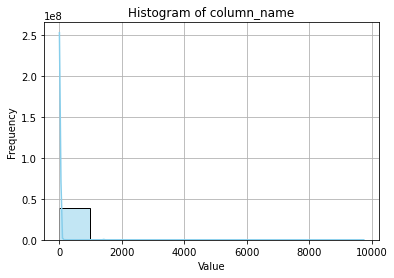

In [23]:
import seaborn as sns

# Assuming your DataFrame is named df and the column you want to plot is 'column_name'
sns.histplot(taxidf_cleaned['trip_duration'], bins=10, kde=True, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<AxesSubplot:>

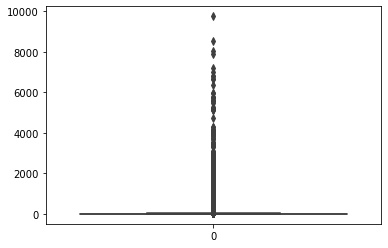

In [24]:
sns.boxplot(data = taxidf_cleaned['trip_duration'], orient= "v")

<AxesSubplot:>

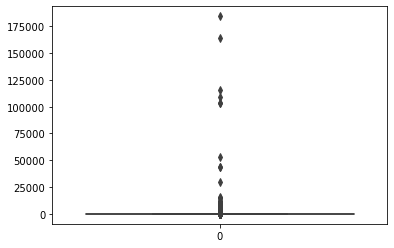

In [25]:
sns.boxplot(data = taxidf_cleaned['trip_distance'], orient= "v")

0


count    3.826921e+07
mean     3.515862e+00
std      5.644610e+01
min      0.000000e+00
25%      1.100000e+00
50%      1.860000e+00
75%      3.490000e+00
max      1.843408e+05
Name: trip_distance, dtype: float64

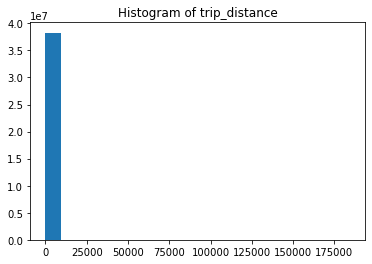

In [26]:
import matplotlib.pyplot as plt

plt.hist(taxidf_cleaned['trip_distance'], bins = 20)
plt.title('Histogram of ' + 'trip_distance')

print(taxidf_cleaned['trip_distance'].isna().sum())
taxidf_cleaned['trip_distance'].describe()

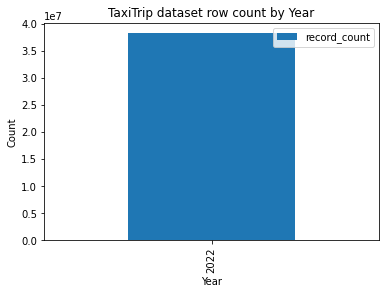

,record_count
year,
2022,38269213


In [27]:
dfAnalysis= taxidf_cleaned
dfAnalysis['year'] = dfAnalysis['tpep_pickup_datetime'].dt.year

year_counts = dfAnalysis.groupby('year').size().reset_index()
year_counts.columns = ['year', 'record_count']
year_counts.set_index('year', inplace=True)

year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('TaxiTrip dataset row count by Year')
plt.show()

year_counts

               record_count
month in 2020              
January             2391379
February            2876546
March               3508768
April               3479575
May                 3457124
June                3423685
July                3067553
August              3058036
September           3065635
October             3540579
November            3128747
December            3271586


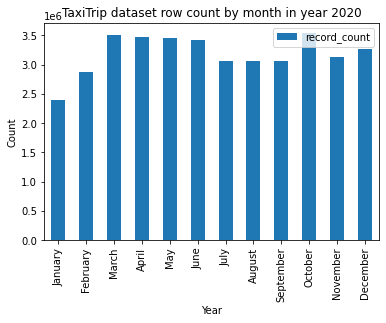

,record_count
month in 2020,
January,2391379
February,2876546
March,3508768
April,3479575
May,3457124
June,3423685
July,3067553
August,3058036
September,3065635


In [29]:
subdf = dfAnalysis[dfAnalysis['year'] == 2022]
subdf['month'] = subdf['tpep_pickup_datetime'].dt.month

monthCt = subdf.groupby('month').size().reset_index()
monthCt.columns = ['month in 2020', 'record_count']
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

monthCt['month in 2020'] = monthCt['month in 2020'].map(month_names)
monthCt.set_index('month in 2020', inplace=True)

print(monthCt)

monthCt.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('TaxiTrip dataset row count by month in year 2020')
plt.show()

monthCt

In [30]:
finaldf = subdf
finaldf['day'] = finaldf['tpep_pickup_datetime'].dt.day
finaldf['dow'] = finaldf['tpep_pickup_datetime'].dt.dayofweek

# Mapping dictionary
day_mapping = {
    0: 'Mo',
    1: 'Tu',
    2: 'We',
    3: 'Th',
    4: 'Fr',
    5: 'Sa',
    6: 'Su'
}

finaldf['dowtext'] = finaldf['dow'].map(day_mapping)

finaldf.shape

(38269213, 25)

Max and Min daily trip counts for each month in 2020:
        month     max    min    mean
0     January   97795  29993   77141
1    February  118549  83739  102734
2       March  125079  92702  113186
3       April  130450  93522  115986
4         May  128369  80544  111520
5        June  128006  88719  114123
6        July  114951  61939   98953
7      August  110736  82314   98646
8   September  123143     60  102188
9     October  127897  92444  114212
10   November  127777  65833  104292
11   December  129705  48372  105535


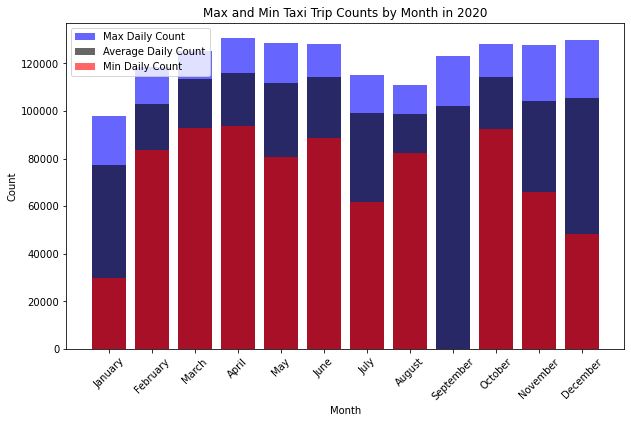

        month     max    min    mean
0     January   97795  29993   77141
1    February  118549  83739  102734
2       March  125079  92702  113186
3       April  130450  93522  115986
4         May  128369  80544  111520
5        June  128006  88719  114123
6        July  114951  61939   98953
7      August  110736  82314   98646
8   September  123143     60  102188
9     October  127897  92444  114212
10   November  127777  65833  104292
11   December  129705  48372  105535


In [36]:
# Group by month and day, then count the records for each day
daily_counts = finaldf.groupby(['month', 'day']).size().reset_index(name='daily_trip_count')

# Find the max and min daily trip count for each month
monthly_stats = daily_counts.groupby('month')['daily_trip_count'].agg(['max', 'min', 'mean']).reset_index()

# Round the average daily trip counts to integers
monthly_stats['mean'] = monthly_stats['mean'].round().astype(int)

# Map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

monthly_stats['month'] = monthly_stats['month'].map(month_names)
# Print the max and min daily trip counts for each month
print("Max and Min daily trip counts for each month in 2020:")
print(monthly_stats)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(monthly_stats['month'], monthly_stats['max'], color='blue', alpha=0.6, label='Max Daily Count')
plt.bar(monthly_stats['month'], monthly_stats['mean'], color='black', alpha=0.6, label='Average Daily Count')
plt.bar(monthly_stats['month'], monthly_stats['min'], color='red', alpha=0.6, label='Min Daily Count')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Max and Min Taxi Trip Counts by Month in 2020')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print the DataFrame for inspection
print(monthly_stats)

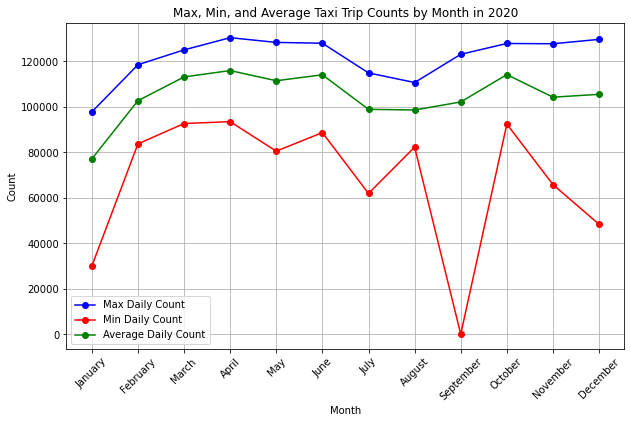

        month     max    min    mean
0     January   97795  29993   77141
1    February  118549  83739  102734
2       March  125079  92702  113186
3       April  130450  93522  115986
4         May  128369  80544  111520
5        June  128006  88719  114123
6        July  114951  61939   98953
7      August  110736  82314   98646
8   September  123143     60  102188
9     October  127897  92444  114212
10   November  127777  65833  104292
11   December  129705  48372  105535


In [38]:
 # Plot the results
plt.figure(figsize=(10, 6))

# Plot max counts
plt.plot(monthly_stats['month'], monthly_stats['max'], marker='o', linestyle='-', color='blue', label='Max Daily Count')

# Plot min counts
plt.plot(monthly_stats['month'], monthly_stats['min'], marker='o', linestyle='-', color='red', label='Min Daily Count')

# Plot average counts
plt.plot(monthly_stats['month'], monthly_stats['mean'], marker='o', linestyle='-', color='green', label='Average Daily Count')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Max, Min, and Average Taxi Trip Counts by Month in 2020')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the DataFrame for inspection
print(monthly_stats)

In [ ]:
mdf1 = finaldf[finaldf['month'] == 1]
mdf2 = finaldf[finaldf['month'] == 2]

mdf1['day'] = mdf1['tpep_pickup_datetime'].dt.day
mdf1['dow'] = mdf1['tpep_pickup_datetime'].dt.dayofweek
mdf2['day'] = mdf2['tpep_pickup_datetime'].dt.day
mdf2['dow'] = mdf2['tpep_pickup_datetime'].dt.dayofweek
mdf2 = mdf2[mdf2['day'] != 27] # dropped this column due to less records

# Mapping dictionary
day_mapping = {
    0: 'Mo',
    1: 'Tu',
    2: 'We',
    3: 'Th',
    4: 'Fr',
    5: 'Sa',
    6: 'Su'
}

# Apply mapping
mdf1['dowtext'] = mdf1['dow'].map(day_mapping)
mdf2['dowtext'] = mdf2['dow'].map(day_mapping)

dayCt1 = mdf1.groupby(['day','dowtext']).size().reset_index(name='count')
print("Month 1 day count:")
print(dayCt1)

dayCt2 = mdf2.groupby(['day','dowtext']).size().reset_index(name='count')
print("Month 2 day count:")
print(dayCt2)

In [ ]:
finaldf['month_day'] = finaldf['tpep_pickup_datetime'].dt.strftime('%m/%d')
finaldf['dow'] = finaldf['tpep_pickup_datetime'].dt.dayofweek

finaldf['dowtext'] = finaldf['dow'].map(day_mapping)

janfebDayCt = finaldf.groupby(['month_day','dowtext']).size().reset_index(name='count')
print("Month day count:")
print(janfebDayCt)


In [ ]:
# Filter the DataFrame to include only rows with 'group_column2' values in included_values
filtered_df = janfebDayCt[janfebDayCt['dowtext'].isin(['Sa','Su'])]
print(filtered_df)

# Pivot the DataFrame to make group_column2 as columns
pivot1 = filtered_df.pivot(index='month_day', columns='dowtext', values='count')

# Plot the line graph
pivot1.plot(kind='line', marker='o', legend=True)

# Add labels and title
plt.xlabel('Jan & Feb month data by day of the week, Sat and Sun')
plt.ylabel('Record Count')
plt.title('Line Graph with Grouped Data')

# Show the plot
#plt.legend(title='Group Column 2')
plt.grid(True)
plt.show()

In [ ]:
# Filter the DataFrame to include only rows with 'group_column2' values in included_values
filtered_df = dayCt1[dayCt1['dowtext'].isin(['Sa','Su'])]
print(filtered_df)
# Group by two columns and calculate the count
grouped_data = filtered_df.groupby(['day', 'dowtext']).size().reset_index(name='count')

# Pivot the DataFrame to make group_column2 as columns
pivot_data = grouped_data.pivot(index='day', columns='dowtext', values='count')

# Plot the bar graph
ax = pivot_data.plot(kind='bar', legend=False)

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Count')
plt.title('Bar Graph with Grouped Data')

# Set y-axis ticks to display actual count values
max_count = pivot_data.max().max()  # Find the maximum count value
ax.set_yticks(range(int(max_count) + 1))  # Convert max_count to integer
ax.set_yticklabels(range(int(max_count) + 1))

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
finaldf['store_and_fwd_flag'] = le.fit_transform(finaldf[['store_and_fwd_flag']])

In [39]:
finaldf.head(10)

,tpep_pickup_datetime,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,year,month,day,dow,dowtext
0,2022-01-01 00:00:08,2,2022-01-01 00:14:14,1.0,7.94,1.0,0,138,255,1,...,0.3,30.41,0.0,1.25,14.10,2022,1,1,5,Sa
1,2022-01-01 00:00:11,2,2022-01-01 00:14:29,1.0,5.55,1.0,0,132,215,2,...,0.3,20.05,0.0,1.25,14.30,2022,1,1,5,Sa
2,2022-01-01 00:00:17,2,2022-01-01 00:31:04,1.0,3.86,1.0,0,170,68,1,...,0.3,28.56,2.5,0.00,30.78,2022,1,1,5,Sa
3,2022-01-01 00:00:18,2,2022-01-01 00:13:27,1.0,3.37,1.0,0,79,209,1,...,0.3,20.16,2.5,0.00,13.15,2022,1,1,5,Sa
4,2022-01-01 00:00:20,2,2022-01-01 00:20:51,1.0,4.89,1.0,0,68,256,1,...,0.3,28.34,2.5,0.00,20.52,2022,1,1,5,Sa
5,2022-01-01 00:00:23,1,2022-01-01 00:24:06,1.0,19.10,2.0,0,132,236,1,...,0.3,75.72,2.5,1.25,23.72,2022,1,1,5,Sa
6,2022-01-01 00:00:29,2,2022-01-01 00:06:52,2.0,1.46,1.0,0,238,263,2,...,0.3,10.80,2.5,0.00,6.38,2022,1,1,5,Sa
7,2022-01-01 00:00:30,2,2022-01-01 00:10:18,1.0,5.05,1.0,0,132,216,2,...,0.3,18.05,0.0,1.25,9.80,2022,1,1,5,Sa
8,2022-01-01 00:00:30,2,2022-01-01 00:20:31,1.0,5.05,1.0,0,170,166,1,...,0.3,27.36,2.5,0.00,20.02,2022,1,1,5,Sa
9,2022-01-01 00:00:44,2,2022-01-01 00:08:54,1.0,2.17,1.0,0,263,233,1,...,0.3,14.76,2.5,0.00,8.17,2022,1,1,5,Sa


In [ ]:
# Columns to exclude
columns_to_exclude = ['month_day','dowtext']

# Create a new DataFrame excluding the specified columns
finaldf1 = finaldf.drop(columns=columns_to_exclude)

In [ ]:
corr_matrix = finaldf1.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example: Print highly correlated pairs
high_corr = corr_matrix.abs().stack().sort_values(ascending=False)
print(high_corr[high_corr != 1][:10]) # excluding self-correlations

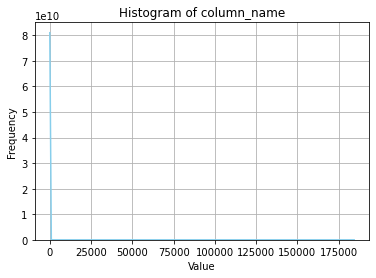

In [41]:
import seaborn as sns

sns.histplot(finaldf['trip_distance'], bins=10, kde=True, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

0


count    3.826921e+07
mean     3.515862e+00
std      5.644610e+01
min      0.000000e+00
25%      1.100000e+00
50%      1.860000e+00
75%      3.490000e+00
max      1.843408e+05
Name: trip_distance, dtype: float64

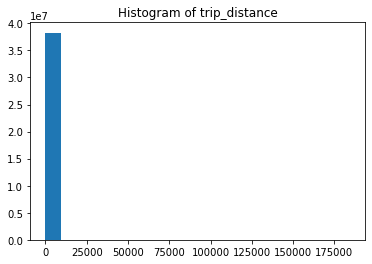

In [42]:
plt.hist(finaldf['trip_distance'], bins = 20)
plt.title('Histogram of ' + 'trip_distance')

print(finaldf['trip_distance'].isna().sum())
finaldf['trip_distance'].describe()

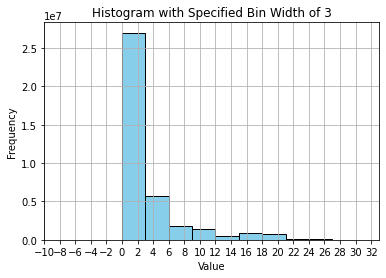

count   38269213.00
mean           3.52
std           56.45
min            0.00
25%            1.10
50%            1.86
75%            3.49
max       184340.80
Name: trip_distance, dtype: float64


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of bins based on the bin width and the range of data
bin_width = 3  # Specify the desired bin width
data_min = min(finaldf['trip_distance'])
data_max = max(finaldf['trip_distance'])
num_bins = int((data_max - data_min) / bin_width)

# Create the histogram with specified bin width
plt.hist(finaldf['trip_distance'], bins=num_bins, color='skyblue', edgecolor='black')  
# Set x-axis limits
plt.xlim(-10, 33)
# Set x-axis ticks (optional, to ensure only 0 to 50 is displayed clearly)
plt.xticks(np.arange(-10, 33, 2))
plt.title('Histogram with Specified Bin Width of 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Set print options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(finaldf['trip_distance'].describe())

In [44]:
# Count negative values in column trip_distance
count_negatives = (finaldf['trip_distance'] < 0).sum()

print("Number of negative values in column 'A':", count_negatives)

result = finaldf.loc[finaldf['trip_distance'] < 0, 'trip_distance']
print(result)

Number of negative values in column 'A': 0
Series([], Name: trip_distance, dtype: float64)


In [45]:
finaldf['trip_distance_abs'] = finaldf['trip_distance'].abs()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(finaldf['trip_distance_abs'].describe())

count   38269213.00
mean           3.52
std           56.45
min            0.00
25%            1.10
50%            1.86
75%            3.49
max       184340.80
Name: trip_distance_abs, dtype: float64


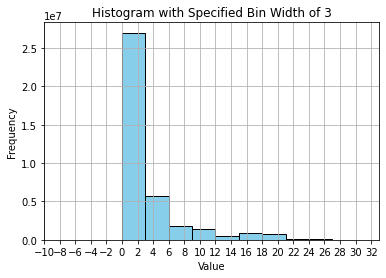

In [46]:
# Calculate the number of bins based on the bin width and the range of data
bin_width = 3  # Specify the desired bin width
data_min = min(finaldf['trip_distance_abs'])
data_max = max(finaldf['trip_distance_abs'])
num_bins = int((data_max - data_min) / bin_width)

# Create the histogram with specified bin width
plt.hist(finaldf['trip_distance_abs'], bins=num_bins, color='skyblue', edgecolor='black')  
# Set x-axis limits
plt.xlim(-10, 33)
# Set x-axis ticks (optional, to ensure only 0 to 50 is displayed clearly)
plt.xticks(np.arange(-10, 33, 2))
plt.title('Histogram with Specified Bin Width of 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<AxesSubplot:>

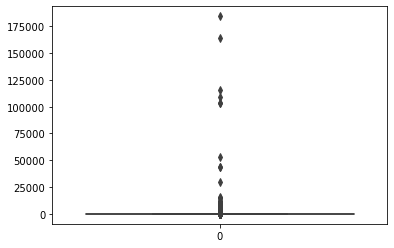

In [47]:
sns.boxplot(data = finaldf['trip_distance'], orient= "v")

<AxesSubplot:>

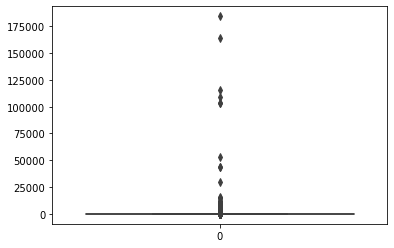

In [48]:
sns.boxplot(data = finaldf['trip_distance_abs'], orient= "v")

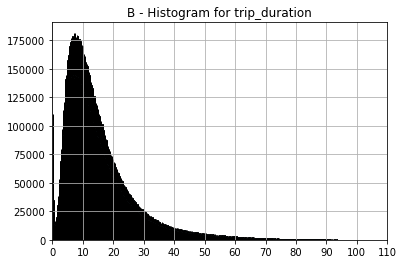

count   38269213.00
mean          17.22
std           49.09
min            0.02
25%            7.35
50%           12.13
75%           19.67
max         9747.05
Name: trip_duration, dtype: float64
Bin edges: [   0.02          0.09311771    0.16623543 ... 9746.90376457 9746.97688229
 9747.05      ]
Counts per bin: [110114. 104814.  73410. ...      0.      0.      1.]


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of bins based on the bin width and the range of data
bin_width = 10  # Specify the desired bin width
data_min = min(finaldf['trip_duration'])
data_max = max(finaldf['trip_duration'])
num_bins = int((data_max - data_min) / bin_width)

# Create the histogram with specified bin width
#plt.hist(finaldf1['trip_duration'], bins=num_bins, color='skyblue', edgecolor='black') 
# Create histogram and capture the bin edges
counts, bin_edges, _ = plt.hist(finaldf['trip_duration'], bins='auto', color='skyblue', edgecolor='black') 

# Set x-axis limits
plt.xlim(0, 110)
# Set x-axis ticks (optional, to ensure only 0 to 50 is displayed clearly)
plt.xticks(np.arange(0, 111, 10))
#plt.title('Histogram with Specified Bin Width')
plt.title('B - Histogram for trip_duration')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
plt.grid(True)
plt.show()
np.set_printoptions(suppress=True)
# Set print options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(finaldf['trip_duration'].describe())

# Print the bin edges
print("Bin edges:", bin_edges)
print("Counts per bin:", counts)

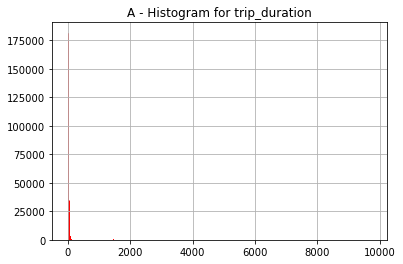

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of bins based on the bin width and the range of data
bin_width = 10  # Specify the desired bin width
data_min = min(finaldf['trip_duration'])
data_max = max(finaldf['trip_duration'])
num_bins = int((data_max - data_min) / bin_width)

# Create the histogram with specified bin width
#plt.hist(finaldf1['trip_duration'], bins=num_bins, color='skyblue', edgecolor='black') 
# Create histogram and capture the bin edges
counts, bin_edges, _ = plt.hist(finaldf['trip_duration'], bins='auto', color='skyblue', edgecolor='red') 

plt.title('A - Histogram for trip_duration')
plt.grid(True)
plt.show()

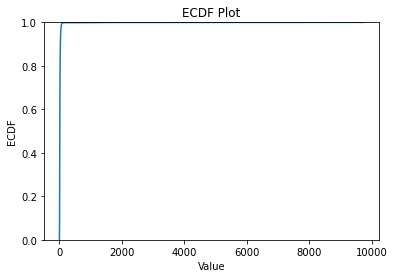

In [52]:
# Create an ECDF plot
sns.ecdfplot(finaldf['trip_duration'])
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.show()

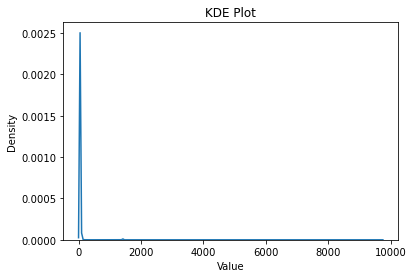

In [53]:
# Create a KDE plot
sns.kdeplot(finaldf['trip_duration'], bw_adjust=1.0)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

In [54]:
finaldf_nonZ = finaldf[finaldf['trip_duration'] != 0]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(finaldf_nonZ['trip_duration'].describe())

print(finaldf['trip_duration'].describe())

count   38269213.00
mean          17.22
std           49.09
min            0.02
25%            7.35
50%           12.13
75%           19.67
max         9747.05
Name: trip_duration, dtype: float64
count   38269213.00
mean          17.22
std           49.09
min            0.02
25%            7.35
50%           12.13
75%           19.67
max         9747.05
Name: trip_duration, dtype: float64


<AxesSubplot:>

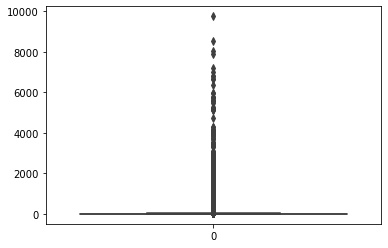

In [55]:
sns.boxplot(data = finaldf['trip_duration'], orient= "v")

In [56]:
# Count negative values in column trip_distance
count_zeros = (finaldf['trip_duration'] == 0).sum()

print("Number of zero values in column 'trip_duration':", count_zeros)

#result1 = finaldf1.loc[finaldf1['trip_duration'] < 0, 'trip_duration']
#print(result1)

Number of zero values in column 'trip_duration': 0


In [58]:
# Set print options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(finaldf['trip_duration'].describe())

finaldf.head(20)

count   38269213.00
mean          17.22
std           49.09
min            0.02
25%            7.35
50%           12.13
75%           19.67
max         9747.05
Name: trip_duration, dtype: float64


,tpep_pickup_datetime,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_duration,year,month,day,dow,dowtext,trip_distance_abs
0,2022-01-01 00:00:08,2,2022-01-01 00:14:14,1.00,7.94,1.00,0,138,255,1,...,30.41,0.00,1.25,14.10,2022,1,1,5,Sa,7.94
1,2022-01-01 00:00:11,2,2022-01-01 00:14:29,1.00,5.55,1.00,0,132,215,2,...,20.05,0.00,1.25,14.30,2022,1,1,5,Sa,5.55
2,2022-01-01 00:00:17,2,2022-01-01 00:31:04,1.00,3.86,1.00,0,170,68,1,...,28.56,2.50,0.00,30.78,2022,1,1,5,Sa,3.86
3,2022-01-01 00:00:18,2,2022-01-01 00:13:27,1.00,3.37,1.00,0,79,209,1,...,20.16,2.50,0.00,13.15,2022,1,1,5,Sa,3.37
4,2022-01-01 00:00:20,2,2022-01-01 00:20:51,1.00,4.89,1.00,0,68,256,1,...,28.34,2.50,0.00,20.52,2022,1,1,5,Sa,4.89
5,2022-01-01 00:00:23,1,2022-01-01 00:24:06,1.00,19.10,2.00,0,132,236,1,...,75.72,2.50,1.25,23.72,2022,1,1,5,Sa,19.10
6,2022-01-01 00:00:29,2,2022-01-01 00:06:52,2.00,1.46,1.00,0,238,263,2,...,10.80,2.50,0.00,6.38,2022,1,1,5,Sa,1.46
7,2022-01-01 00:00:30,2,2022-01-01 00:10:18,1.00,5.05,1.00,0,132,216,2,...,18.05,0.00,1.25,9.80,2022,1,1,5,Sa,5.05
8,2022-01-01 00:00:30,2,2022-01-01 00:20:31,1.00,5.05,1.00,0,170,166,1,...,27.36,2.50,0.00,20.02,2022,1,1,5,Sa,5.05
9,2022-01-01 00:00:44,2,2022-01-01 00:08:54,1.00,2.17,1.00,0,263,233,1,...,14.76,2.50,0.00,8.17,2022,1,1,5,Sa,2.17
